In [1]:
import pyart
import matplotlib.pyplot as plt
from matplotlib import ticker, colors
import numpy as np
import os
from JSAnimation import IPython_display
from JSAnimation.IPython_display import display_animation

from matplotlib.animation import FuncAnimation, writers

%matplotlib inline


In [27]:
indir = '/data/csapr_RHI_Sample/rhi/20110524/'
all_files = os.listdir(indir)
rhis = []
for fl in all_files:
        rhis.append(os.path.join(indir, fl))
rhis.sort()

In [28]:
zes = []
gf = []
for filename in rhis:
    try:
        print filename
        radar = pyart.io.read(filename)
        zes.append(radar.fields['reflectivity']['data'].mean())
        del(radar)
        gf.append(filename)
    except:
        print 'doh'


/data/csapr_RHI_Sample/rhi/20110524/224009.mdv
/data/csapr_RHI_Sample/rhi/20110524/224751.mdv
/data/csapr_RHI_Sample/rhi/20110524/225535.mdv
/data/csapr_RHI_Sample/rhi/20110524/230315.mdv
/data/csapr_RHI_Sample/rhi/20110524/231057.mdv
/data/csapr_RHI_Sample/rhi/20110524/231839.mdv
/data/csapr_RHI_Sample/rhi/20110524/232621.mdv
/data/csapr_RHI_Sample/rhi/20110524/233402.mdv
/data/csapr_RHI_Sample/rhi/20110524/234144.mdv
/data/csapr_RHI_Sample/rhi/20110524/234926.mdv
/data/csapr_RHI_Sample/rhi/20110524/235708.mdv


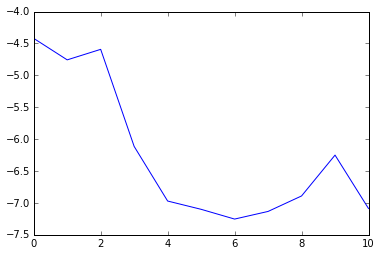

In [29]:
plt.plot(zes)



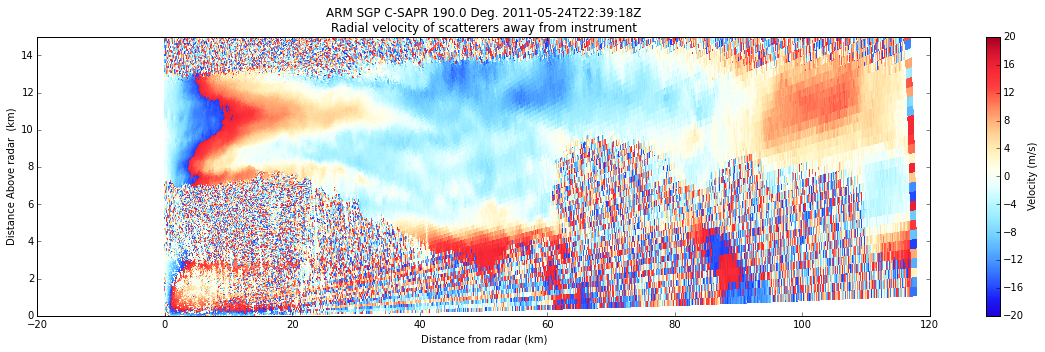

In [30]:
# create the plot using RadarDisplay
sweep = 2
# read file
radar = pyart.io.read_mdv(rhis[0])
display = pyart.graph.RadarDisplay(radar)
fig = plt.figure(figsize=[20, 5])
ax = fig.add_subplot(111)

# plot velocity
display.plot('velocity', sweep=sweep, vmin=-20, vmax=20.0, fig=fig,
             ax=ax, cmap='pyart_BuDRd18', colorbar_label='Velocity (m/s)')
display.set_limits( ylim=[0, 15])
